In [1]:
%matplotlib inline

#import sys
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import pynbody
from michaels_functions import (center_and_r_vir, remove_bulk_velocity,
                                read_unit_from_info)
from matplotlib.colors import LogNorm
from matplotlib.pyplot import figure

In [2]:
run = "hydro_59"
out = "output_00050"
path = "bulk1/data_2/" + run + "/output/"
data = pynbody.load(path + out)
aexp = data.properties['a']
data.physical_units()

r_vir = center_and_r_vir(data, aexp, path)
remove_bulk_velocity(data)
r_e = 0.1 * r_vir

sph_5 = pynbody.filt.Sphere(radius='%f kpc' % (r_e*1.4))
region = data[sph_5]

omega_b, unit_l, unit_d, unit_t = read_unit_from_info(data)

('shifting on Stars:', SimArray([ 0.00308878, -0.03302971, -0.04676732], 'kpc'))
('virial radius:', SimArray(152.40432611, 'kpc'))


In [79]:
omega_b

0.0450000017881393

In [83]:
aexp

0.600005205267563

In [80]:
unit_l

6.82025380323961e+25

In [81]:
unit_d

1.23367583719985e-29

In [82]:
unit_t

1.63687521954501e+17

In [5]:
m_p = pynbody.array.SimArray(1.672621777e-24, "g")
K_b = pynbody.array.SimArray(1.38064852e-16, "cm**2 g s**-2 K**-1")
G = pynbody.array.SimArray(6.67259e-8, "cm**3 g**-1 s**-2")
T_mean = pynbody.array.SimArray(10., "K")
K_b_ev = pynbody.array.SimArray(8.617e-5, "eV K**-1")
K_b_erg = pynbody.array.SimArray(1.38064852e-16, "erg K**-1")
c_si = pynbody.array.SimArray(2.99792458e5, "km s**-1")
c_cgs = pynbody.array.SimArray(2.99792458e10, "cm s**-1")
h_ev = pynbody.array.SimArray(4.13566770e-15, "eV s")
h_erg = pynbody.array.SimArray(6.626196e-27, "erg s")
mH_cgs = pynbody.array.SimArray(1.6737236e-24, 'g')  # hydrogen mass
T_bg = pynbody.array.SimArray(2.73, "K")
eV = pynbody.array.SimArray(6.241509e18, "J")
L_sun = pynbody.array.SimArray(3.846e33, "erg s**-1")
cell_width = pynbody.array.SimArray(region.gas["smooth"]*3.086e+21, "cm")
M_sun = pynbody.array.SimArray(2e33, "g")
eV_to_ergs = pynbody.array.SimArray(1.60218e-12, "erg eV**-1")
cell_width_arr = pynbody.array.SimArray(region.gas["smooth"]*3.086e+21, "cm")

In [6]:
X_H2_bar = np.load('outputs/pdf_RT_1.2/X_H2_bar.npy')
X_CO_bar = np.load('outputs/pdf_RT_1.2/X_CO_bar.npy')
mach_no_arr = np.load('outputs/pdf_RT_1.2/mach_no_arr.npy')
n_H_mean_arr = np.load('outputs/pdf_RT_1.2/n_H_mean_arr.npy')
metal_arr = np.load('outputs/pdf_RT_1.2/metal_arr.npy')
temperature = np.load('outputs/pdf_RT_1.2/T.npy')
l_CO_bar = np.load('outputs/pdf_RT_1.2/l_CO_bar.npy')
l_CO_SI_bar = np.load('outputs/pdf_RT_1.2/l_CO_SI_bar.npy')

In [7]:
M_H2 = n_H_mean_arr * cell_width_arr**3 * m_p * X_H2_bar

In [8]:
M_H2_galaxy = np.sum(M_H2)
print np.log10(M_H2_galaxy/M_sun)
print M_H2_galaxy
print M_H2_galaxy/M_sun/1e9

8.781125980113782
1.2082476963324495e+42
0.6041238481662249


In [9]:
L_CO = np.sum(l_CO_bar)
print L_CO
print np.log10(L_CO/L_sun)

6.530240224337596e+35
2.229919877817526


In [11]:
L_CO_SI = np.sum(l_CO_SI_bar)
print L_CO_SI
print L_CO_SI/1e7

43693292.88322379
4.369329288322379


/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


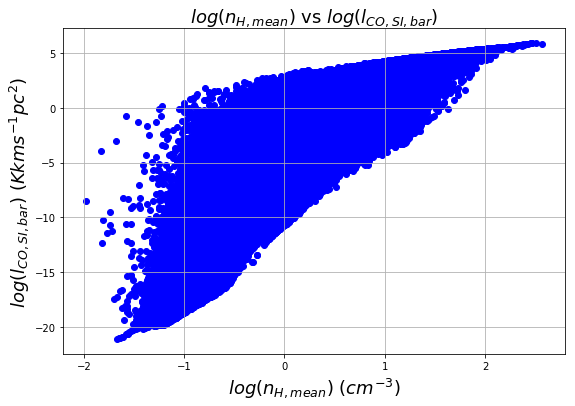

In [35]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_SI_bar), 
                      c="b")
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
plt.ylabel('$log(l_{CO, SI, bar}) \ (K km s^{-1} pc^{2})$')
# ax.set_ylim([-0.1,0.5])
# ax.set_xlim([-4, 7])
plt.grid(b=True, which='both', axis='both')
plt.title("$log(n_{H, mean})$ vs $log(l_{CO, SI, bar})$")
plt.savefig('outputs/parallel_code_pdf_RT/log(n_H_mean)vsl_CO_SI_bar.png', 
            dpi=300, bbox_inches='tight')
plt.show()

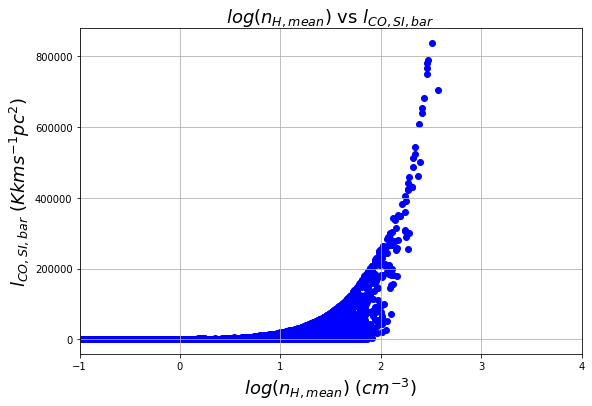

In [36]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.scatter(np.log10(n_H_mean_arr), l_CO_SI_bar, 
                      c="b")
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
plt.ylabel('$l_{CO, SI, bar} \ (K km s^{-1} pc^{2})$')
# ax.set_ylim([-0.1,5])
ax.set_xlim([-1, 4])
plt.grid(b=True, which='both', axis='both')
plt.title("$log(n_{H, mean})$ vs $l_{CO, SI, bar}$")
plt.savefig('outputs/parallel_code_pdf_RT/log(n_H_mean)vsl_CO_SI_bar.png', 
            dpi=300, bbox_inches='tight')
plt.show()

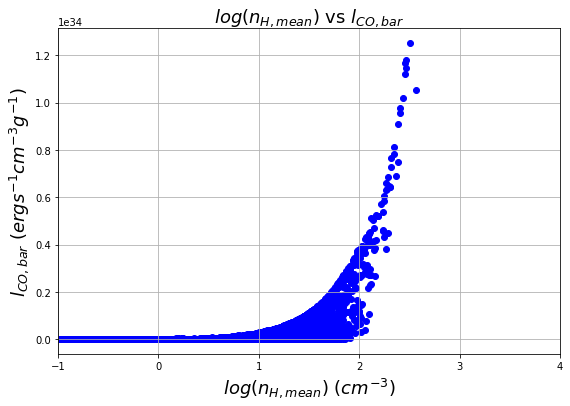

In [37]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.scatter(np.log10(n_H_mean_arr), l_CO_bar, 
                      c="b")
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
plt.ylabel('$l_{CO, bar} \ (erg s^{-1} cm^{-3} g^{-1})$')
# ax.set_ylim([-3e-5,6e-4])
ax.set_xlim([-1, 4])
plt.grid(b=True, which='both', axis='both')
plt.title("$log(n_{H, mean})$ vs $l_{CO, bar}$")
plt.savefig('outputs/parallel_code_pdf_RT/log(n_H_mean)vsl_CO_bar.png', 
            dpi=300, bbox_inches='tight')
plt.show()

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


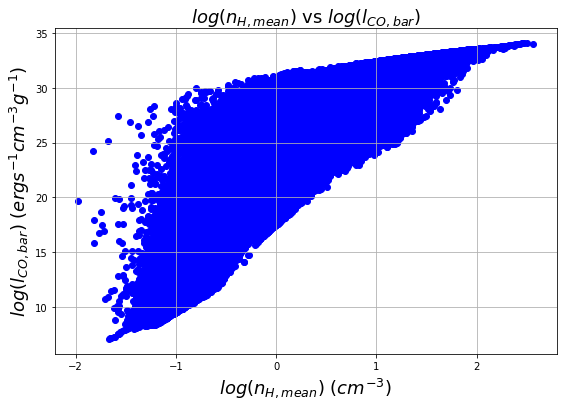

In [38]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_bar), 
                      c="b")
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
plt.ylabel('$log(l_{CO, bar}) \ (erg s^{-1} cm^{-3} g^{-1})$')
# ax.set_ylim([-3e-5,6e-4])
# ax.set_xlim([0, 4])
plt.grid(b=True, which='both', axis='both')
plt.title("$log(n_{H, mean})$ vs $log(l_{CO, bar})$")
plt.savefig('outputs/parallel_code_pdf_RT/log(n_H_mean)vslog(l_CO_bar).png', 
            dpi=300, bbox_inches='tight')
plt.show()

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


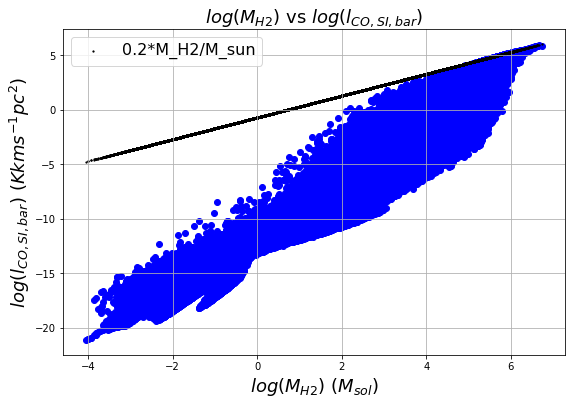

In [69]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.scatter(np.log10(M_H2/M_sun), np.log10(l_CO_SI_bar), 
                      c="b")
plt.scatter(np.log10(M_H2/M_sun), np.log10(0.2*M_H2/M_sun), c='k', s=1.5, label="0.2*M_H2/M_sun")
plt.xlabel('$log(M_{H2}) \ (M_{sol})$')
plt.ylabel('$log(l_{CO, SI, bar}) \ (K km s^{-1} pc^{2})$')
# ax.set_ylim([-3,7])
# ax.set_xlim([3, 7])
ax.legend(loc = 'upper left')
plt.grid(b=True, which='both', axis='both')
plt.title("$log(M_{H2})$ vs $log(l_{CO, SI, bar})$")
plt.savefig('outputs/parallel_code_pdf_RT/log(M_H2)vslog(l_CO_SI_bar).png', 
            dpi=300, bbox_inches='tight')
plt.show()

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


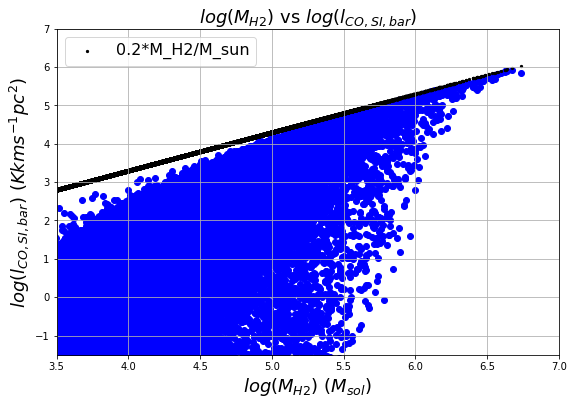

In [72]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.scatter(np.log10(M_H2/M_sun), np.log10(l_CO_SI_bar), 
                      c="b")
plt.scatter(np.log10(M_H2/M_sun), np.log10(0.2*M_H2/M_sun), c='k', s=5, label="0.2*M_H2/M_sun")
plt.xlabel('$log(M_{H2}) \ (M_{sol})$')
plt.ylabel('$log(l_{CO, SI, bar}) \ (K km s^{-1} pc^{2})$')
ax.set_ylim([-1.5,7])
ax.set_xlim([3.5, 7])
ax.legend(loc = 'upper left')
plt.grid(b=True, which='both', axis='both')
plt.title("$log(M_{H2})$ vs $log(l_{CO, SI, bar})$")
plt.savefig('outputs/parallel_code_pdf_RT/log(M_H2)vslog(l_CO_SI_bar)-zoomed.png', 
            dpi=300, bbox_inches='tight')
plt.show()